#HYPOTHESIS TESTING#

So first thing that comes in our mind is that what is Hypothesis Testing?
So it is a statiscal model i.e. used in making statistical decisions using experimental data.It is a form of statistical interface that used sample to draw conclusions about population parameter.

It is used to check our inference.

Steps for doing Hypothesis testing:-
Step1) 1st tentative assumption is made about the parameter that is called **Null hypothesis** (STATUS QUO) and is denoted by $H_0$ . Then **Alternate hypotesis** (BOLD CLAIM) is stated denoted by $H_a $ or $H_1$ and it is opposite of $H_0$.
$$H_0 --> = , \geq , \leq $$
$$H_1 --> \neq , < , > $$ Here the process involves using sample data to determine if $H_0$ is rejected or not. It $H_0$ is rejected than $H_1$ is true. Here procedure leads to the acceptance of $H_0$ when $H_0$ is true and $H_0$ when $H_0$ is false

Step2)Then take a sample and compute avearage of the sample.

Step3)Compute Test statistics:-
* If $\sigma $ (standard deviation) is known then choose z score.
$$ Z score = \frac{\bar{X}-\mu_x}{\frac{\sigma}{\sqrt n}}$$
* If $\sigma$ (standard deviation) is known then choose t score $

$$ t score = \frac{\bar{X}-\mu_x}{\frac{s}{\sqrt n}}$$

Step4) Decide Significance level it is the person conductting hypothesis allows maximum probability of making error by rejecting $H_0$ when $H_0$ is true. 
$$ 1 - \alpha = confidence level$$ lower $\alpha$ more and more evidence to reject null hypothesis.

Step5)  Apply decision rule:

* If test statistic is z-score -

Two tailed z-test: $$ |z| \gt z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
Right tailed z-test:$$ z \gt z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Left tailed z-test:$$ z \lt -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
* If test statistic is t-score

Two tailed t-test:$$ |t| \gt t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Right tailed t-test:$$ t \gt t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Left tailed t-test:$$ t \lt t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

*  After this Compute p-value $ P(Test \ Statistics | H_0) $

For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value \lt \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

**Question 1**:- ***Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?***  

Ans) 

Step -1) So here we can assume that our bold claim is that avg is not equal to 500 grams. So we can formulate our null hypothesis and alternate hypothesis.$$H_0=500$$  $$H_1 \neq 500$$
Step -2) We have to take samples suppose we take sample of size n= 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
now we have to calculate it's average it's average is 465.3

Step - 3) Compute test statistics here t score as standard deviation is not given $$ t score = \frac{\bar{X}-\mu_x}{\frac{s}{\sqrt n}}$$

Step-4) Define $\alpha$

Step- 5) Check whether it is one-tailed or two -tailed and compute p-score

In [31]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t




In [32]:
# Defining a t score function
def t_score(sample_size,sample_mean,pop_mean,sample_std):
  num = sample_mean - pop_mean
  den= sample_std/sample_size**(1/2)
  return num/den

In [33]:
sample = [490,220,470,500,495,496,496,498,508,480]
mean = sum(sample)/len(sample)
print(mean)

465.3


In [34]:
import statistics
std = statistics.pstdev(sample)
print(std) # Calculating the standard deviation of samle

82.39180784519782


In [35]:
# Stating up all the values
sample_size = len(sample)
sample_mean = mean
pop_mean = 500
sample_std = std

In [36]:
t=t_score(sample_size,sample_mean,pop_mean,sample_std)
print(t)

-1.331819724286319


As here $H_1 \neq 500 $ as here $\neq $sign comes we should do two tail test

In [40]:
import scipy
ci = 0.95 #confidence level

# Two tail

alpha = 1 - ci

t_critical = scipy.stats.t.ppf(1-alpha/2, df = (sample_size-1))

print(t_critical)

2.2621571627409915


In [41]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


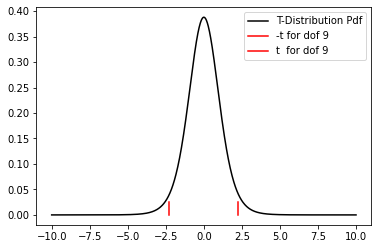

In [43]:
# Plotting t_score
# degree of freedom
dof = sample_size -1
ntails = 2 # number of tails

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs,scipy.stats.t.pdf(xs,dof),'k',label="T-Distribution Pdf")

critline = np.linspace(0,alpha/ntails)
xs_1 = len(critline)*[-t_critical]
xs_2 = len(critline) * [t_critical]

plt.plot(xs_1,critline,'r',label= "-t for dof 9")
plt.plot(xs_2,critline,'r',label= "t  for dof 9")
plt.legend()

In [46]:
# Conclusion using p test

p_value = 2 * (1.0 - scipy.stats.t.cdf(np.abs(t),df=dof))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.2156616653606347
Fail to reject Null Hypothesis


***Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?***

Ans) 

Step -1) So here we can assume that our bold claim is that avg rating is greater than 4. So we can formulate our null hypothesis and alternate hypothesis.$$H_0\leq4$$  $$H_1 > 4$$
Step -2) We have to take samples suppose we take sample of size n= 10 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
now we have to calculate it's average it's average is 4.25

Step - 3) Compute test statistics here t score as standard deviation is not given $$ t score = \frac{\bar{X}-\mu_x}{\frac{s}{\sqrt n}}$$

Step-4) Define $\alpha$

Step- 5) Check whether it is one-tailed or two -tailed and compute p-score

In [49]:
sample_1 = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
mean = sum(sample_1)/len(sample_1)
print(mean)

4.25


In [78]:
std = statistics.pstdev(sample_1)
print(std)

0.82915619758885


In [53]:
sample_size = len(sample_1)
sample_mean = mean
pop_mean = 4
sample_std = std


In [54]:
t=t_score(sample_size,sample_mean,pop_mean,sample_std)
print(t)

1.3483997249264843


In [55]:
# One tail because of sign >
ci= 0.95
alpha = 1 - ci

t_critical = scipy.stats.t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [56]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


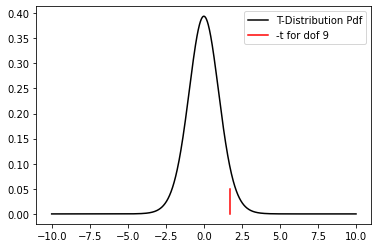

In [59]:
# degree of freedom
dof = sample_size -1
ntails = 1 # number of tails

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs,scipy.stats.t.pdf(xs,dof),'k',label="T-Distribution Pdf")

critline = np.linspace(0,alpha/ntails)
xs_1 = len(critline)*[t_critical]
#xs_2 = len(critline) * [t_critical]

plt.plot(xs_1,critline,'r',label= "-t for dof 9")

plt.legend()

In [60]:
# Conclusion using p test

p_value = 2 * (1.0 - scipy.stats.t.cdf(np.abs(t),df=dof))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.1933852770712241
Fail to reject Null Hypothesis


**Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?**

Ans) 

Step -1) So here we can assume that our bold claim is that avg is atleast 15 km/litre. So we can formulate our null hypothesis and alternate hypothesis.$$H_0\leq15$$  $$H_1 > 15$$
Step -2) We have to take samples suppose we take sample of size n= 10 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
now we have to calculate it's average it's average is 15.1

Step - 3) Compute test statistics here t score as standard deviation is not given $$ t score = \frac{\bar{X}-\mu_x}{\frac{s}{\sqrt n}}$$

Step-4) Define $\alpha$

Step- 5) Check whether it is one-tailed or two -tailed and compute p-score






In [61]:
sample_2 = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
mean = sum(sample_2)/len(sample_2)
print(mean)

15.098999999999998


In [79]:
std = statistics.pstdev(sample_2)
print(std)

0.9994043225842081


In [63]:
sample_size = len(sample_2)
sample_mean = mean
pop_mean = 15
sample_std = std

In [64]:
t=t_score(sample_size,sample_mean,pop_mean,sample_std)
print(t)

0.44300534782572615


In [65]:
# One tail beacuse of > sign in alternate hypothesis
ci= 0.95
alpha = 1 - ci

t_critical = scipy.stats.t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [66]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


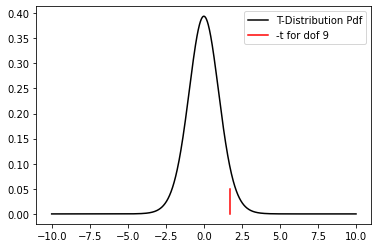

In [67]:
# degree of freedom
dof = sample_size -1
ntails = 1 # number of tails

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs,scipy.stats.t.pdf(xs,dof),'k',label="T-Distribution Pdf")

critline = np.linspace(0,alpha/ntails)
xs_1 = len(critline)*[t_critical]
#xs_2 = len(critline) * [t_critical]

plt.plot(xs_1,critline,'r',label= "-t for dof 9")

plt.legend()

In [68]:
# Conclusion using p test

p_value = 2 * (1.0 - scipy.stats.t.cdf(np.abs(t),df=dof))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.6627645761332714
Fail to reject Null Hypothesis


**Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?**

Ans) 

Step -1) So here we can assume that our bold claim is that avg is less than 100 ms. So we can formulate our null hypothesis and alternate hypothesis.$$H_0\geq100$$  $$H_1 < 100$$
Step -2) We have to take samples suppose we take sample of size n= 10 $$[100,101,97,98,99,102,100,101,96,95] $$
now we have to calculate it's average it's average is 98.9

Step - 3) Compute test statistics here t score as standard deviation is not given $$ t score = \frac{\bar{X}-\mu_x}{\frac{s}{\sqrt n}}$$

Step-4) Define $\alpha$

Step- 5) Check whether it is one-tailed or two -tailed and compute p-score

In [70]:
sample_3 = [100,101,97,98,99,102,100,101,96,95]
mean = sum(sample_3)/len(sample_3)
print(mean)

98.9


In [80]:
std = statistics.pstdev(sample_3)
print(std)

2.211334438749598


In [72]:
sample_size = len(sample_3)
sample_mean = mean
pop_mean = 100
sample_std = std

In [73]:
t=t_score(sample_size,sample_mean,pop_mean,sample_std)
print(t)

-1.5730345284868466


In [81]:
# One tail beause of sign < in alternate hypothesis
ci= 0.95
alpha = 1 - ci

t_critical = scipy.stats.t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [75]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


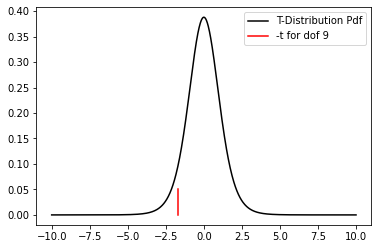

In [76]:
# degree of freedom
dof = sample_size -1
ntails = 1 # number of tails

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs,scipy.stats.t.pdf(xs,dof),'k',label="T-Distribution Pdf")

critline = np.linspace(0,alpha/ntails)
xs_1 = len(critline)*[-t_critical]
#xs_2 = len(critline) * [t_critical]

plt.plot(xs_1,critline,'r',label= "-t for dof 9")

plt.legend()

In [77]:
# Conclusion using p test

p_value = 2 * (1.0 - scipy.stats.t.cdf(np.abs(t),df=dof))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.15016148212690528
Fail to reject Null Hypothesis
